In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Load course data from pickle file

dfCrs = pd.read_pickle('../data/STAT300_clean.pkl')

In [3]:
#Group income levels and convert to integer class values based on relative ranking

Incomes = list(dfCrs['HOUSE_INCOME_DESCR'].sort_values().unique())
Inc_Codes = [0,0,0,0,1,1,1,1,1,1,2,2,2,2,2,2,3,3,0,3,3,3,3,3,3,1]
dictMap = dict(zip(Incomes, Inc_Codes))

dfCrs['INCOME'] = dfCrs['HOUSE_INCOME_DESCR'].replace(dictMap)
dfCrs[['HOUSE_INCOME_DESCR', 'INCOME']]
dfCrs = dfCrs.drop('HOUSE_INCOME_DESCR', axis = 1)

In [4]:
#Classify students and successful or not and count number of successes/failures for weighting

passing = ['A', 'B', 'C', 'P']

succ = dfCrs.apply(lambda x: 1 if x['OFFICIAL_GRADE'] in passing else 0, axis = 1)

dfCrs['SUCCESS'] = succ

2085

In [29]:
#Create decision tree classifier based strictly on GPA--using class_weight - 'balanced' to account for
#significantly more successes than failures

GPA_features = ['SUCCESS', 'max_HS_GPA']

dfTree = dfCrs[GPA_features]

train, test = train_test_split(dfTree, test_size = 0.2, random_state = 66, shuffle = True)

X_train, X_test, y_train, y_test = train.drop(columns = ['SUCCESS']), test.drop(columns = ['SUCCESS']), train['SUCCESS'], test['SUCCESS']

clf = tree.DecisionTreeClassifier(max_depth = 3, class_weight = 'balanced', min_samples_leaf = 100)

model = clf.fit(X_train,y_train)

The accuracy of this GPA model is 0.679


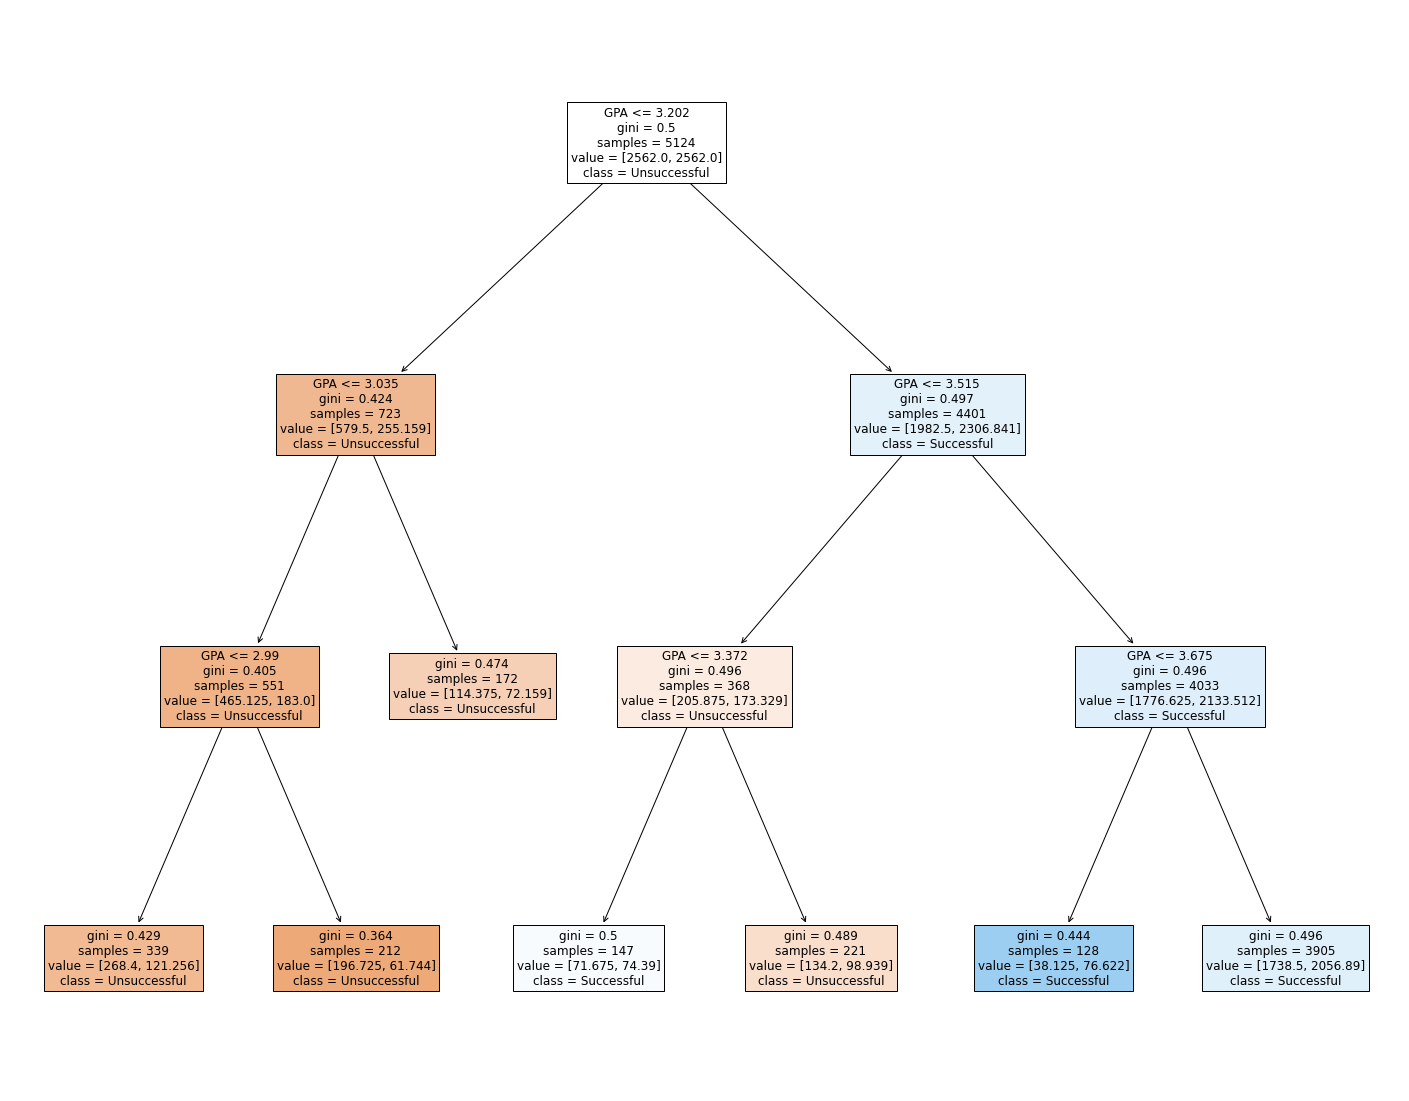

In [30]:
#Calculate accuracy of GPA model and save an image of the resulting tree

y_pred = model.predict(X_test)

accarray = confusion_matrix(y_test, y_pred)

err = accarray[0][1]+accarray[1][0]

total = 0

for i in [0,1]:
    for j in [0,1]:
        total += accarray[i][j]

accuracy = round((total - err)/total, 3)
print('The accuracy of this GPA model is '+ str(accuracy))

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model, feature_names = ['GPA'], class_names = ['Unsuccessful', 'Successful'], fontsize = 12, filled = True)

fig.savefig("../image_outputs/GPA_decision_tree.jpg")

In [27]:
#Create decision tree classifier based on GPA and Household Income

features = ['SUCCESS', 'max_HS_GPA', 'INCOME']

dfTree = dfCrs[features]

train, test = train_test_split(dfTree, test_size = 0.2, random_state = 66, shuffle = True)

X_train, X_test, y_train, y_test = train.drop(columns = ['SUCCESS']), test.drop(columns = ['SUCCESS']), train['SUCCESS'], test['SUCCESS']

clf = tree.DecisionTreeClassifier(max_depth = 3, class_weight = 'balanced', min_samples_leaf= 100)

model = clf.fit(X_train,y_train)

The accuracy of this GPA model is 0.683


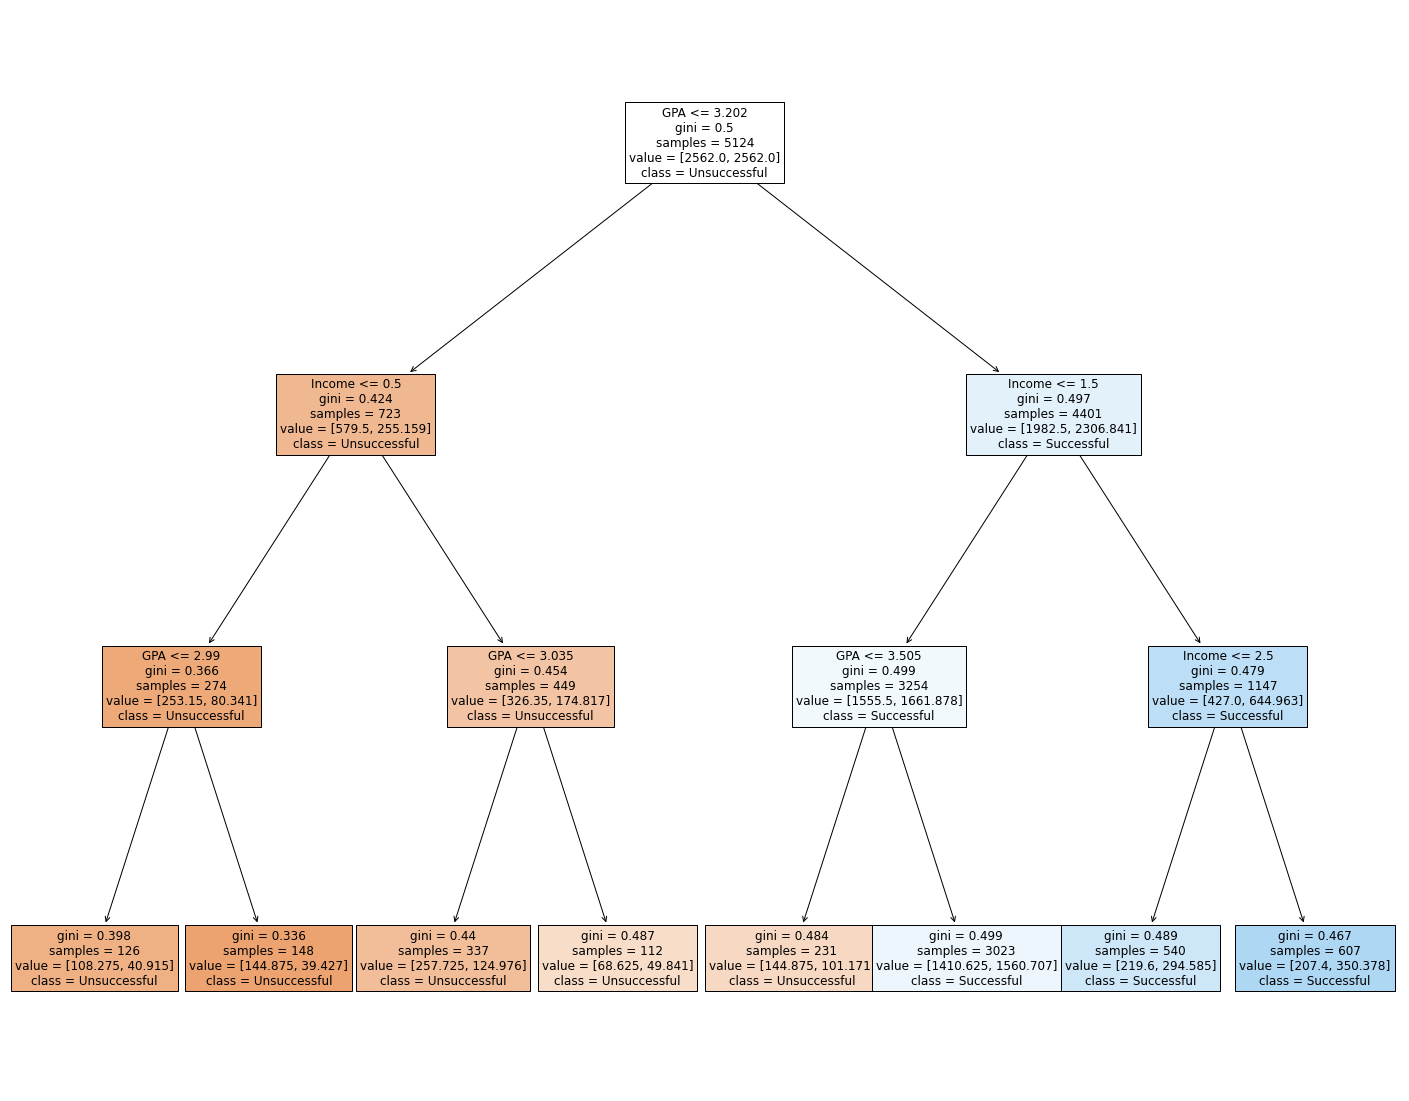

In [28]:
#Calculate accuracy of GPA model and save an image of the resulting tree

y_pred = model.predict(X_test)

accarray = confusion_matrix(y_test, y_pred)

err = accarray[0][1]+accarray[1][0]

total = 0

for i in [0,1]:
    for j in [0,1]:
        total += accarray[i][j]

accuracy = round((total - err)/total, 3)
print('The accuracy of this GPA model is '+ str(accuracy))

fig = plt.figure(figsize=(25, 20))
_ = tree.plot_tree(model, feature_names = ['GPA', 'Income'], class_names = ['Unsuccessful', 'Successful'], fontsize = 12, filled = True)

fig.savefig("../image_outputs/GPA_Income_decision_tree.jpg")